   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

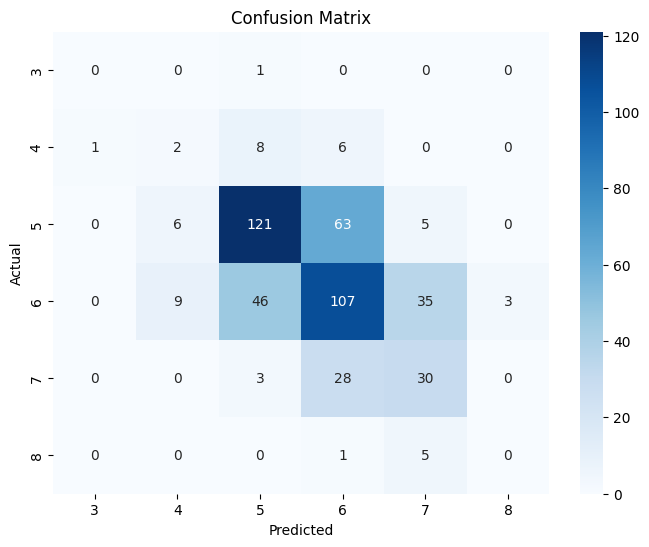

Prediction for user input [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]: Predicted Quality: 5


In [1]:

# Naive Bayesian Classification Algorithm.
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv('assign9.csv')  # Make sure to replace with your actual dataset path
data = data.fillna(0)  # Fill missing values with 0 or an appropriate method

# Step 3: Exploratory Data Analysis (EDA)
print(data.head())  # Show the first few rows of the dataset
print(data.info())  # Get info on the data types and missing values
print(data.describe())  # Get statistical summary of the dataset

# Step 4: Feature Engineering
# Assuming the target variable is 'quality' and the rest are features
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target variable

# Step 5: Splitting the dataset into training and testing sets (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

# Step 6: Model Training
model = GaussianNB()  # Create an instance of the Gaussian Naive Bayes model
model.fit(X_train, y_train)  # Fit the model on training data

# Step 7: Model Evaluation
y_pred = model.predict(X_test)  # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred)  # Get confusion matrix
class_report = classification_report(y_test, y_pred)  # Get classification report

# Print evaluation metrics

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Single User Input Testing
# Create a function for predicting a single user input
def predict_user_input(input_data):
    # Ensure input data matches the expected format (DataFrame)
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)  # Predict using the trained model
    return f'Predicted Quality: {prediction[0]}'

# Example of user input
# Input format: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, 
#                 free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol]
user_input = [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]  # Example input
result = predict_user_input(user_input)
print(f'Prediction for user input {user_input}: {result}')
